In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
img=cv2.imread('a1images/rice.png', cv2.IMREAD_GRAYSCALE)
img_gaussian=cv2.imread('a1images/rice-gaussian.png', cv2.IMREAD_GRAYSCALE)

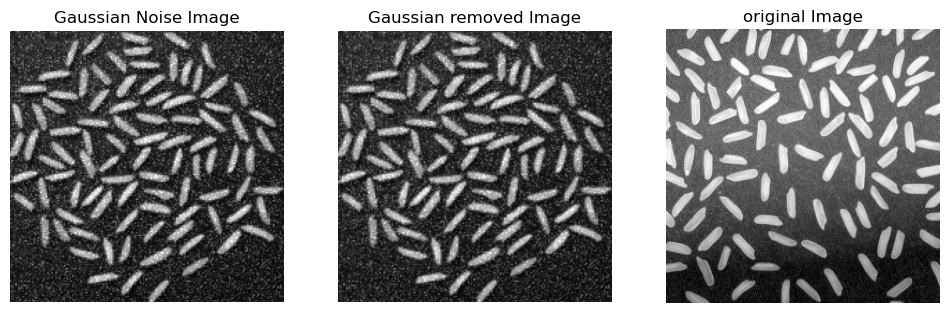

In [15]:
gaussian_denoised = cv2.GaussianBlur(img_gaussian, (5, 5), 0)

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(img_gaussian, cmap='gray')
plt.title('Gaussian Noise Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gaussian_denoised, cmap='gray')
plt.title('Gaussian removed Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img, cmap='gray')
plt.title('original Image')
plt.axis('off')

plt.show()

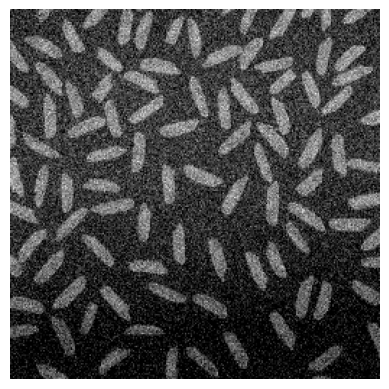

In [63]:
from skimage.util import random_noise
import numpy as np
import cv2

img = cv2.imread("a1images/rice.png", cv2.IMREAD_GRAYSCALE)
img_float = img / 255.0

img_gaussian = random_noise(img_float, mode='gaussian', mean=-0.2, var=0.01)
img_gaussian = np.clip(img_gaussian * 255, 0, 255).astype(np.uint8)

plt.imshow(img_gaussian, cmap='gray')
plt.axis('off')
plt.show()

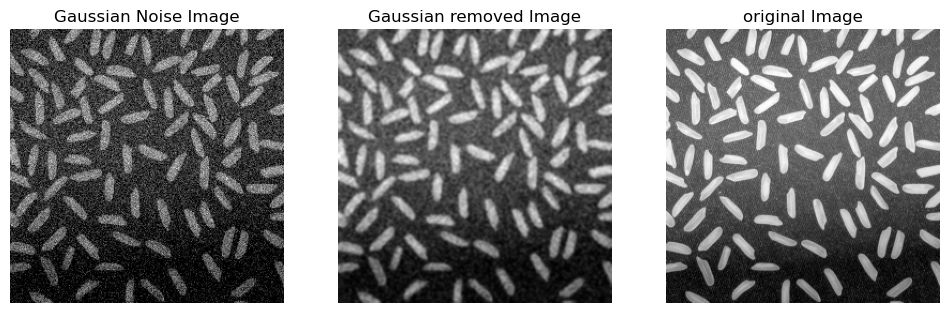

In [65]:
gaussian_denoised = cv2.GaussianBlur(img_gaussian, (5, 5), 0)

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(img_gaussian, cmap='gray')
plt.title('Gaussian Noise Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gaussian_denoised, cmap='gray')
plt.title('Gaussian removed Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img, cmap='gray')
plt.title('original Image')
plt.axis('off')

plt.show()

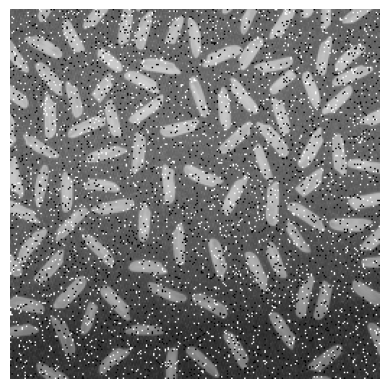

In [79]:
img_saltpepper = random_noise(img, mode='s&p', amount=0.09)
img_saltpepper = (img_saltpepper * 255).astype(np.uint8)

plt.imshow(img_saltpepper, cmap='gray')
plt.axis('off')
plt.show()

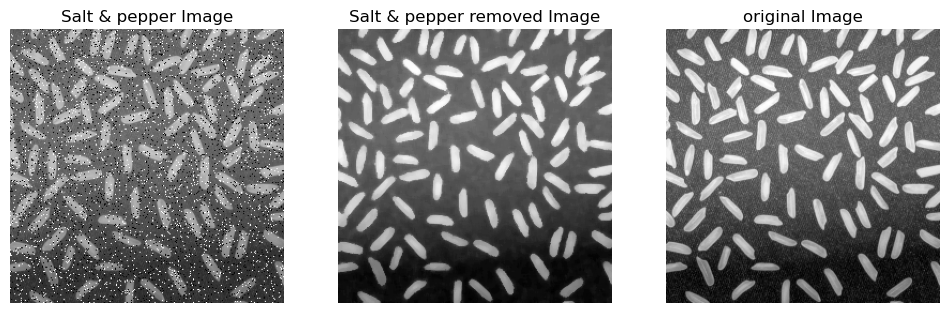

In [83]:
saltpepper_denoised = cv2.medianBlur(img_saltpepper, 5)

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(img_saltpepper, cmap='gray')
plt.title('Salt & pepper Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(saltpepper_denoised, cmap='gray')
plt.title('Salt & pepper removed Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img, cmap='gray')
plt.title('original Image')
plt.axis('off')

plt.show()

In [91]:
thresh_value, Segmented_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print("Threshold Value:", thresh_value)

Threshold Value: 131.0


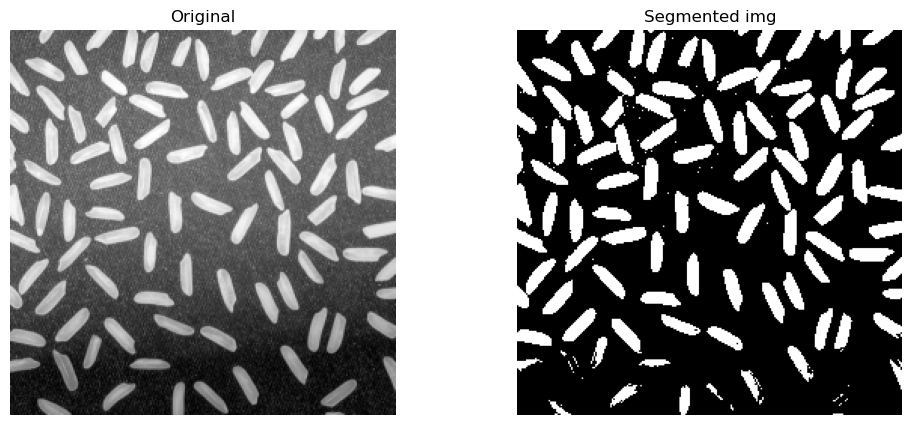

In [93]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(Segmented_img, cmap='gray')
plt.title("Segmented img")
plt.axis('off')

plt.show()

In [97]:
small_kernel = np.ones((3,3), np.uint8)
salt_denoise = cv2.morphologyEx(Segmented_img, cv2.MORPH_OPEN, small_kernel, iterations=2)
pepper_denoise = cv2.morphologyEx(salt_denoise, cv2.MORPH_CLOSE, small_kernel, iterations=2)

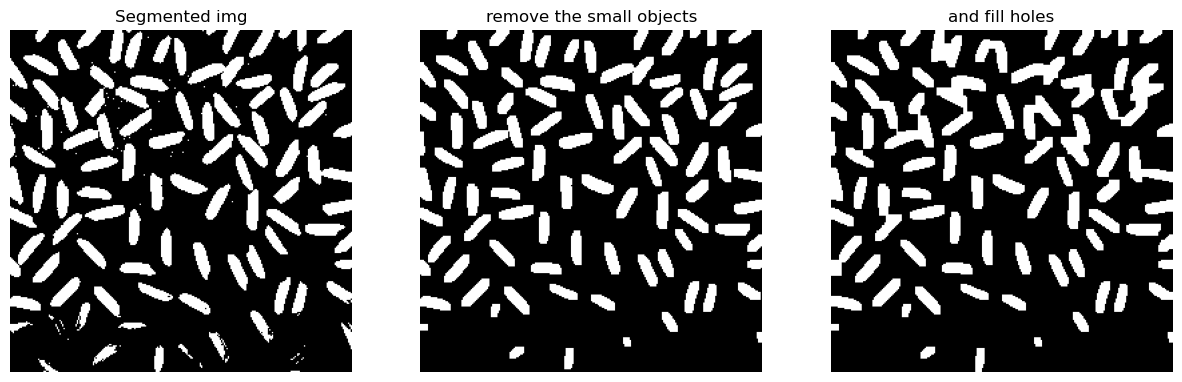

In [99]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(Segmented_img, cmap='gray')
plt.title("Segmented img")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(salt_denoise, cmap='gray')
plt.title("remove the small objects")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(pepper_denoise, cmap='gray')
plt.title("and fill holes")
plt.axis('off')

plt.show()

In [103]:
components, labels = cv2.connectedComponents(closed)

print("Rice grains:", components - 1)  

Rice grains: 74


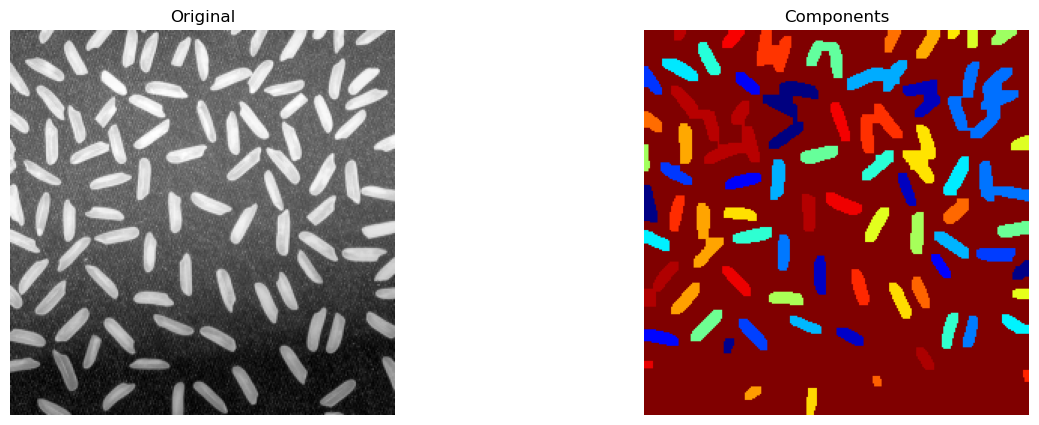

In [105]:
component_img = cv2.applyColorMap((labels * 15).astype(np.uint8), cv2.COLORMAP_JET)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(label_img)
plt.title("Components")
plt.axis('off')

plt.show()